###  Desafio - Etapa2 🚀
---

Nesta etapa do desafio, darei continuidade à análise dos dados sobre as chegadas de turistas ao Brasil em 2024. A partir do arquivo já armazenado no bucket do Amazon S3, realizarei a leitura do dataset diretamente na aplicação, criando um DataFrame com a biblioteca pandas.Em seguida, farei o tratamento dos dados, deixando o CSV limpo e estruturado para a execução das três análises estratégicas definidas anteriormente. Para cada uma delas, aplicarei pelo menos uma das manipulações obrigatórias: filtros com operadores lógicos, funções de agregação, condições, conversões, manipulações de datas e de strings, de forma que todas elas sejam utilizadas em algum momento. Ao final, os resultados obtidos em cada análise e o arquivo csv limpo serão salvos na pasta Etapa3, para que possam ser enviados ao bucket criado para o desafio.

Importação inicial
__________________________________________________________________________________________________
Para esta etapa, importei a biblioteca pandas para criar e manipular o DataFrame a partir do arquivo CSV armazenado no S3. Utilizei boto3 para acessar o serviço Amazon S3 e realizar a leitura direta do arquivo, e botocore.exceptions para tratar possíveis erros durante essa operação. As credenciais de acesso foram carregadas com a biblioteca dotenv, garantindo segurança ao utilizar o arquivo .env, enquanto a os foi usada para acessar essas variáveis no ambiente do sistema. Para ler o arquivo diretamente da nuvem sem salvá-lo localmente, utilizei BytesIO, da biblioteca io, que permite trabalhar com os dados em memória. A biblioteca unidecode foi usada para padronizar textos, removendo acentos e caracteres especiais, em relação ao tratamento de dados textuais. Por fim, importei matplotlib.pyplot e seaborn, que serão utilizadas para criar visualizações gráficas que acompanham as análises realizadas.

In [10]:
import pandas as pd
import boto3
import os
import unidecode 

from io import BytesIO
from dotenv import load_dotenv
from botocore.exceptions import ClientError
import matplotlib.pyplot as plt
import seaborn as sns

Após o envio do arquivo chegadas_2024.csv para o Amazon S3, iniciei sua leitura diretamente da nuvem. Carreguei as credenciais de acesso com o dotenv, garantindo uma autenticação segura junto à AWS. Em seguida, configurei o cliente S3 com a biblioteca boto3, utilizando as variáveis de ambiente. Defini o nome do bucket e do arquivo a ser acessado, e utilizei o método get_object para recuperar o conteúdo diretamente do S3. Com o BytesIO, li os dados em memória e criei o DataFrame com pandas, especificando a codificação ISO-8859-1 e o separador ;, conforme o formato original do CSV. O código foi encapsulado em blocos de tratamento de exceções para identificar possíveis erros na autenticação, acesso ao bucket ou leitura dos dados. Com isso, o DataFrame foi carregado com sucesso, permitindo dar continuidade às análises na próxima etapa do projeto.

In [11]:
load_dotenv()
env = os.environ

s3 = boto3.client(
    's3',
    aws_access_key_id=env.get("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=env.get("AWS_SECRET_ACCESS_KEY"),
    aws_session_token=env.get("AWS_SESSION_TOKEN"),
    region_name=env.get("AWS_REGION")
)

bucket_name = "chegadas-turistas-2024-ana"
arquivo_s3 = "chegadas_2024.csv"

try:
    obj = s3.get_object(Bucket=bucket_name, Key=arquivo_s3)
    conteudo = obj['Body'].read()
    df = pd.read_csv(BytesIO(conteudo), encoding='ISO-8859-1', sep=';')
    print("Arquivo carregado com sucesso!")
    display(df.head())
except ClientError as e:
    print("Erro ao acessar o bucket ou o arquivo no S3:")
    print(e)
except Exception as e:
    print("Erro ao ler ou processar o arquivo:")
    print(e)

Arquivo carregado com sucesso!


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,10
1,América do Sul,4,Argentina,26,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,1197
2,Europa,6,Bélgica,59,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,3
3,América do Norte,3,Canadá,23,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,2
4,América do Sul,4,Chile,28,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,1


Limpeza inicial
__________________________________________________________________________________________________
Após a análise inicial, observei a necessidade de padronizar os nomes das colunas. Para isso, removi espaços em branco nas extremidades, converti os nomes para letras minúsculas, substituí espaços por underscores e eliminei acentuação, adotando a convenção snake_case.

In [12]:
df.columns = df.columns.str.strip()  
df.columns = df.columns.str.lower()  
df.columns = df.columns.str.replace(" ", "_", regex=False)  
df.columns = df.columns.map(unidecode.unidecode) 

df.columns 

Index(['continente', 'cod_continente', 'pais', 'cod_pais', 'uf', 'cod_uf',
       'via', 'cod_via', 'ano', 'mes', 'cod_mes', 'chegadas'],
      dtype='object')

- Converti as colunas continente, país, UF, via e mês, que anteriormente estavam como object para o tipo category, otimizando o uso de memória e facilitando análises categóricas posteriores.

In [13]:
colunas_categoria = ['continente', 'pais', 'uf', 'via', 'mes']
for col in colunas_categoria:
    df[col] = df[col].astype('category')

- Garanti que as colunas de códigos numéricos, como cod_continente, cod_pais, cod_uf, cod_via e cod_mes, estivessem no tipo int64, garantindo a consistência dos dados e possibilitando operações numéricas com maior precisão.

In [14]:
colunas_codigo = ['cod_continente', 'cod_pais', 'cod_uf', 'cod_via', 'cod_mes']
for col in colunas_codigo:
    df[col] = df[col].astype('int64') 

- Utilizei df.dtypes para verificar se os tipos de dados de cada coluna estavam corretos após o tratamento, confirmando, se colunas categóricas e numéricas estavam devidamente convertidas.

In [15]:
df.dtypes

continente        category
cod_continente       int64
pais              category
cod_pais             int64
uf                category
cod_uf               int64
via               category
cod_via              int64
ano                  int64
mes               category
cod_mes              int64
chegadas             int64
dtype: object

Após concluir o tratamento inicial dos dados, salvei o DataFrame resultante em um novo arquivo CSV chamado chegadas_2024_limpo.csv, localizado na pasta Etapa3. Utilizei os parâmetros sep=';' e encoding='ISO-8859-1' para manter a compatibilidade com o formato original. O argumento index=False foi especificado para evitar que o índice do DataFrame fosse adicionado como uma coluna no arquivo. Essa versão limpa do dataset também será utilizada nas próximas análises da etapa 2.

In [16]:
caminho_saida_csv = os.path.join('..', 'Etapa3', 'chegadas_2024_limpo.csv')
df.to_csv(caminho_saida_csv, index=False, sep=';', encoding='ISO-8859-1')

print(f"CSV limpo salvo com sucesso em: {caminho_saida_csv}")

CSV limpo salvo com sucesso em: ..\Etapa3\chegadas_2024_limpo.csv


Q1: Classificação dos países por faixas de volume de turistas
__________________________________________________________________________________________________
Nesta análise, utilizei a função groupby para agrupar os dados por país e somar o total de chegadas de turistas por nacionalidade, consolidando as informações em uma linha por país. Em seguida, calculei a média geral de turistas entre todos os países com mean(), que serviu de base para classificar o volume de chegadas. Para isso, defini a função condicional faixa_volume, que classifica os países em três categorias: Alto, Médio e Baixo, com base em múltiplos da média geral (mais de 1,5 vezes a média é “Alto”, entre 0,5 e 1,5 vezes é “Médio”, abaixo de 0,5 é “Baixo”). A função foi aplicada à coluna chegadas usando apply() para gerar a nova coluna faixa_volume. Por fim, filtrei os países classificados com volume Alto, ordenei os dados de forma decrescente pelo total de chegadas e selecionei os 10 primeiros, destacando as principais nacionalidades que mais visitaram o Brasil.

Manipulações obrigatórias utilizadas:

- Função de agregação: sum() para totalizar as chegadas por país.
- Função condicional: faixa_volume() classifica os valores com base em regras.

In [17]:
df_paises = df.groupby('pais', observed=True)['chegadas'].sum().reset_index()
media_chegadas = df_paises['chegadas'].mean()

def faixa_volume(turistas):
    if turistas > media_chegadas * 1.5:
        return 'Alto'
    elif turistas > media_chegadas * 0.5:
        return 'Médio'
    else:
        return 'Baixo'

df_paises['faixa_volume'] = df_paises['chegadas'].apply(faixa_volume)

df_paises[df_paises['faixa_volume'] == 'Alto'] \
    .sort_values(by='chegadas', ascending=False) \
    .head(10)

,pais,chegadas,faixa_volume
2,Argentina,1960182,Alto
26,Estados Unidos,728537,Alto
11,Chile,653895,Alto
65,Paraguai,465020,Alto
88,Uruguai,388464,Alto
30,França,235163,Alto
69,Portugal,218354,Alto
0,Alemanha,182166,Alto
44,Itália,154495,Alto
71,Reino Unido,153754,Alto


Gráfico Q1: Top 20 Países por Chegadas de Turistas ao Brasil
__________________________________________________________________________________________________

Para construir o gráfico, selecionei os 20 países com maior número de chegadas de turistas ao Brasil, ordenando o DataFrame df_paises pela coluna chegadas em ordem decrescente e utilizando o método head(20) para filtrar esses países. Defini uma paleta de cores personalizada em tons de azul, associando cores diferentes para cada faixa de volume de turistas. Em seguida, criei um gráfico de barras horizontais com a biblioteca seaborn, configurando o eixo y para os nomes dos países e o eixo x para o número de chegadas. Usei o parâmetro hue para colorir as barras conforme a faixa de volume, apliquei a paleta personalizada e defini dodge=False para que as barras fiquem agrupadas por país. Ajustei o tamanho da figura para uma visualização equilibrada e formatei título, rótulos dos eixos e legenda para melhor clareza. A função tight_layout() organizou os elementos para evitar sobreposições. Após exibir o gráfico com plt.show(), salvei a imagem gerada no caminho definido dentro da pasta Etapa3 com alta resolução (300 dpi), garantindo seu uso nas próximas etapas do projeto.

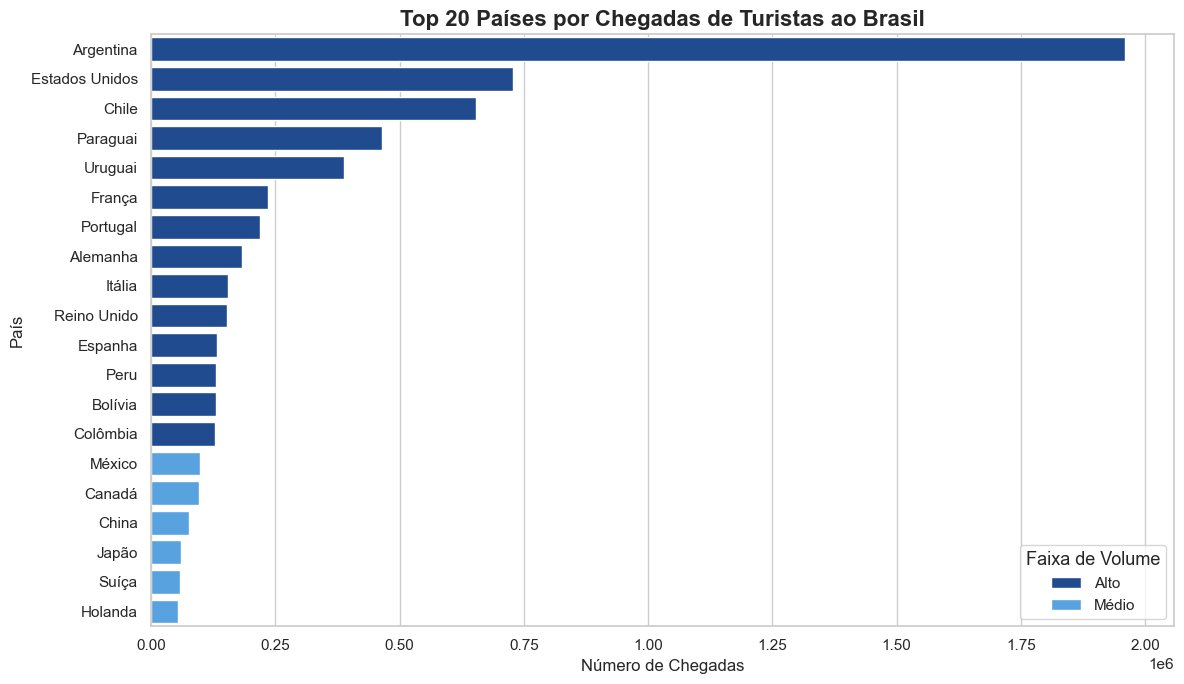

Gráfico salvo com sucesso em: ..\Etapa3\grafico_top20_paises.png


In [18]:
caminho_grafico = os.path.join('..', 'Etapa3', 'grafico_top20_paises.png')
df_top20 = df_paises.sort_values(by='chegadas', ascending=False).head(20)

paleta_azul = {
    'Alto': '#0D47A1',
    'Médio': '#42A5F5',
    'Baixo': '#90CAF9'
}

plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")
sns.barplot(
    data=df_top20,
    x='chegadas',
    y='pais',
    hue='faixa_volume',
    dodge=False,
    palette=paleta_azul,
    order=df_top20.sort_values('chegadas', ascending=False)['pais']
)
plt.title('Top 20 Países por Chegadas de Turistas ao Brasil', fontsize=16, weight='bold')
plt.xlabel('Número de Chegadas', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.legend(title='Faixa de Volume', title_fontsize=13, fontsize=11)
plt.tight_layout()

plt.savefig(caminho_grafico, dpi=300)
plt.show()

print(f"Gráfico salvo com sucesso em: {caminho_grafico}")

Q2: Principais vias de entrada de turistas no Brasil
__________________________________________________________________________________________________

Nesta análise, antes de realizar o agrupamento, utilizei funções de string para padronizar os nomes da coluna via, removendo espaços em branco e convertendo todos os textos para letras minúsculas, evitando duplicidades causadas por variações na grafia. Em seguida, agrupei os dados por via de entrada com groupby, somando o total de turistas que chegaram ao Brasil por cada tipo de via. Após o agrupamento, utilizei uma função de conversão para garantir que a coluna chegadas estivesse no tipo inteiro, assegurando consistência no tipo de dado. Por fim, ordenei os resultados de forma decrescente pelo número total de chegadas, permitindo identificar as principais vias de entrada utilizadas pelos turistas.

Manipulações obrigatórias utilizadas:

- Função de agregação: sum() para totalizar o número de chegadas por via.
- Função de string: .str.strip().str.lower() para padronizar os valores textuais da coluna via.
- Função de conversão: astype(int) para garantir o tipo inteiro na coluna chegadas.



In [19]:
df['via'] = df['via'].str.strip().str.lower()
df_vias = df.groupby('via', observed=True)['chegadas'].sum().reset_index()
df_vias['chegadas'] = df_vias['chegadas'].astype(int)
df_vias = df_vias.sort_values(by='chegadas', ascending=False)

df_vias

,via,chegadas
0,aérea,4604346
3,terrestre,1934823
2,marítima,140570
1,fluvial,93880


Gráfico Q2: Distribuição das Principais Vias de Entrada de Turistas no Brasil
__________________________________________________________________________________________________
Este gráfico de pizza mostra a proporção percentual das principais vias de entrada de turistas no Brasil. Para construí-lo, criei as variáveis vias e chegadas, extraídas do DataFrame df_vias, representando os nomes das vias e o total de chegadas, respectivamente. Defini uma paleta de cores em tons de azul para diferenciar as categorias. Utilizei plt.figure() para ajustar o tamanho da imagem e plt.pie() para gerar o gráfico, com autopct='%1.1f%%' para exibir os percentuais, pctdistance e labeldistance para posicionamento dos textos e bordas brancas entre as fatias para facilitar a visualização. Adicionei uma legenda com plt.legend(), formatei os textos com plt.setp(), e finalizei com título, tight_layout() para ajustar os elementos e plt.savefig() para salvar o gráfico na pasta Etapa3 antes de exibi-lo com plt.show().

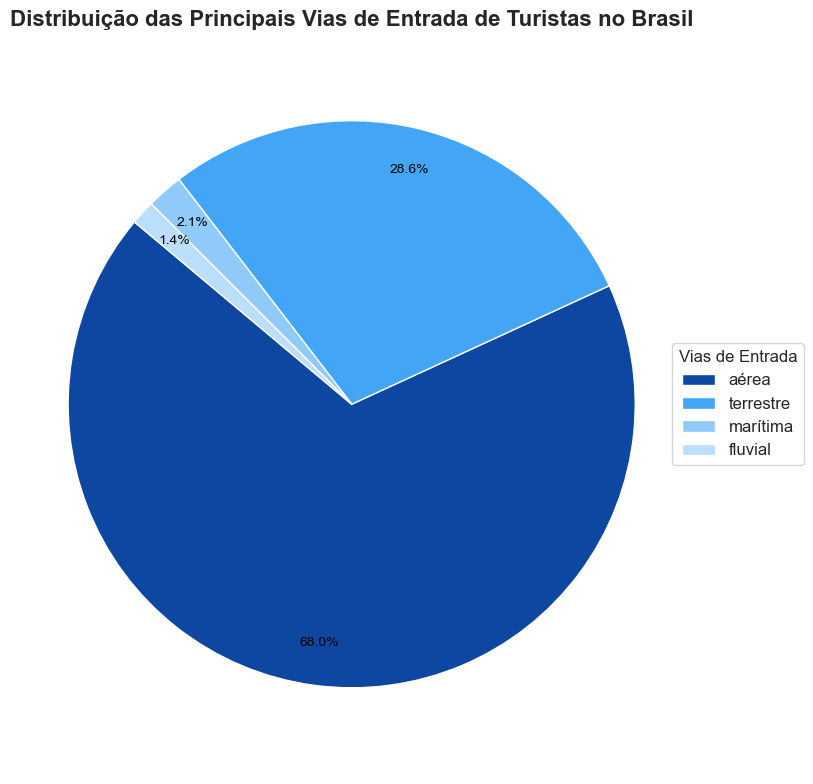

Gráfico salvo com sucesso em: ..\Etapa3\grafico_vias_pizza.png


In [20]:
caminho_grafico_vias = os.path.join('..', 'Etapa3', 'grafico_vias_pizza.png')

vias = df_vias['via']
chegadas = df_vias['chegadas']

cores = ['#0D47A1', '#42A5F5', '#90CAF9', '#BBDEFB']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    chegadas,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=cores,
    wedgeprops={'edgecolor': 'white'},
    pctdistance=0.85,
    labeldistance=1.1
)

plt.legend(wedges, vias, title="Vias de Entrada", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
plt.setp(autotexts, size=10, weight='normal', color='black')
plt.title('Distribuição das Principais Vias de Entrada de Turistas no Brasil', fontsize=16, weight='bold')
plt.axis('equal')
plt.tight_layout()

plt.savefig(caminho_grafico_vias, dpi=300)
plt.show()

print(f"Gráfico salvo com sucesso em: {caminho_grafico_vias}")

Q3: Meses com maior número de chegadas de turistas via aérea em 2024
__________________________________________________________________________________________________

Nesta análise, apliquei uma filtragem composta para selecionar apenas os registros do ano de 2024 e com via de entrada aérea, utilizando dois operadores lógicos para garantir a precisão da amostra. Antes disso, criei uma nova coluna de data combinando as colunas ano e cod_mes com funções de string e conversão, transformando-as em um objeto datetime. A partir dessa nova coluna, extraí o nome do mês em inglês com dt.strftime(), facilitando a identificação dos períodos. Em seguida, agrupei os dados por código do mês, nome em português e nome em inglês, somando o total de chegadas com a função de agregação sum(). Por fim, ordenei os dados do maior para o menor número de chegadas, destacando os meses com maior volume de turismo internacional por via aérea.

Manipulações obrigatórias utilizadas:

- Cláusula com dois operadores lógicos: filtro por ano e via (== e &).
- Função de data: criação da coluna data com pd.to_datetime() e extração do mês com dt.strftime('%B').

In [27]:
df['data'] = pd.to_datetime(df['ano'].astype(str) + '-' + df['cod_mes'].astype(str).str.zfill(2) + '-01')
df['mes_ingles'] = df['data'].dt.strftime('%B')
df_meses = df[(df['ano'] == 2024) & (df['via'] == 'aérea')]
df_meses_agrupado = df_meses.groupby(['cod_mes', 'mes', 'mes_ingles'], observed=True)['chegadas'].sum().reset_index()
df_meses_ordenado = df_meses_agrupado.sort_values(by='chegadas', ascending=False)

df_meses_ordenado

,cod_mes,mes,mes_ingles,chegadas
11,12,Dezembro,December,526874
1,2,Fevereiro,February,497169
2,3,Março,March,471690
0,1,Janeiro,January,439686
10,11,Novembro,November,423466
9,10,Outubro,October,401288
8,9,Setembro,September,356298
7,8,Agosto,August,336580
6,7,Julho,July,325807
3,4,Abril,April,297989


Gráfico Q3: Número de Chegadas por Mês (Via Aérea - 2024)
__________________________________________________________________________________________________
Este gráfico de barras mostra o total de turistas que chegaram ao Brasil por via aérea em cada mês do ano de 2024. Para construí-lo, utilizei o DataFrame df_meses_ordenado, que já contém os meses e os respectivos totais de chegadas, ordenados do maior para o menor volume. A função plt.figure() foi usada para definir o tamanho da figura, enquanto plt.bar() gerou as barras, aplicando uma cor azul com bordas pretas para destacar cada mês. Configurei os eixos com os rótulos adequados, adicionei rotação nas categorias do eixo x para melhor leitura e defini um título informativo. Utilizei plt.tight_layout() para garantir o espaçamento adequado dos elementos, plt.savefig() para salvar o gráfico na pasta Etapa3 e finalizei com plt.show() para exibir a visualização.

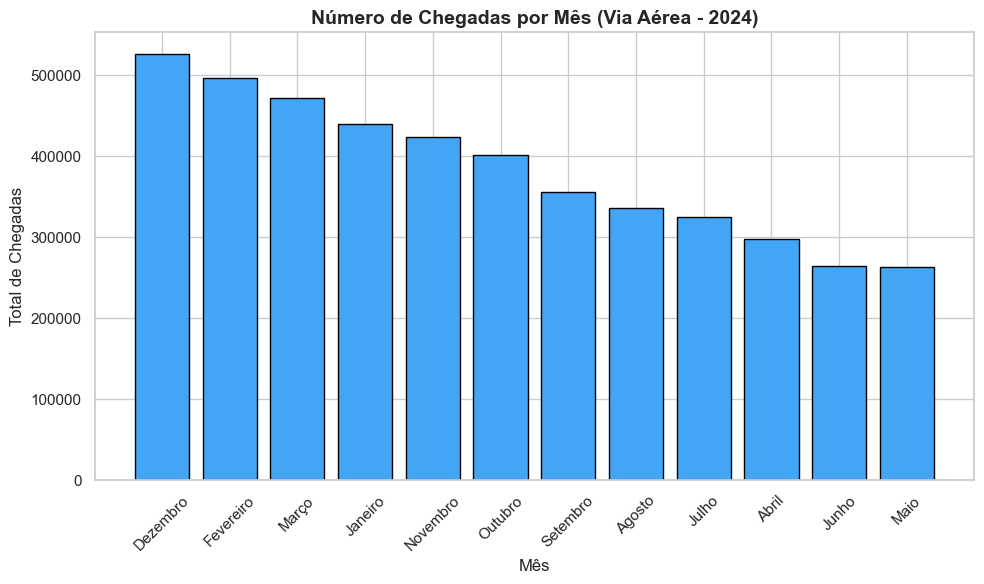

Gráfico salvo com sucesso em: ..\Etapa3\grafico_chegadas_por_mes.png


In [28]:
caminho_grafico_meses = os.path.join('..', 'Etapa3', 'grafico_chegadas_por_mes.png')

plt.figure(figsize=(10, 6))
plt.bar(
    df_meses_ordenado['mes'],
    df_meses_ordenado['chegadas'],
    color='#42A5F5',
    edgecolor='black'
)
plt.title('Número de Chegadas por Mês (Via Aérea - 2024)', fontsize=14, weight='bold')
plt.xlabel('Mês')
plt.ylabel('Total de Chegadas')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(caminho_grafico_meses, dpi=300)
plt.show()

print(f"Gráfico salvo com sucesso em: {caminho_grafico_meses}")